# Mall Customer Segmention :-

**1- loading the dataset**

**2- exeplornig the data**

**3- cleaning the data**

**4- visualizing the data**

**5- preprocissing the data**

**6- loading the model**

**7- showing the results**

# loading the dataset :-

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('DATA/Mall_Customers.csv')

# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# exeploring the data :-

In [207]:
# statical values of the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [208]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# cleaning the data :-

In [209]:
# looking for null values in the dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [210]:
# looking for duplicates in the dataset
df.duplicated().sum()

np.int64(0)

In [211]:
# dropping the 'CustomerID' column as it is not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

In [212]:
# encode gender column
df['Gender'] = df['Gender'].map({'Male': 0 , 'Female': 1})

In [213]:
# showing the cleaned dataset
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# visualizing the data :-

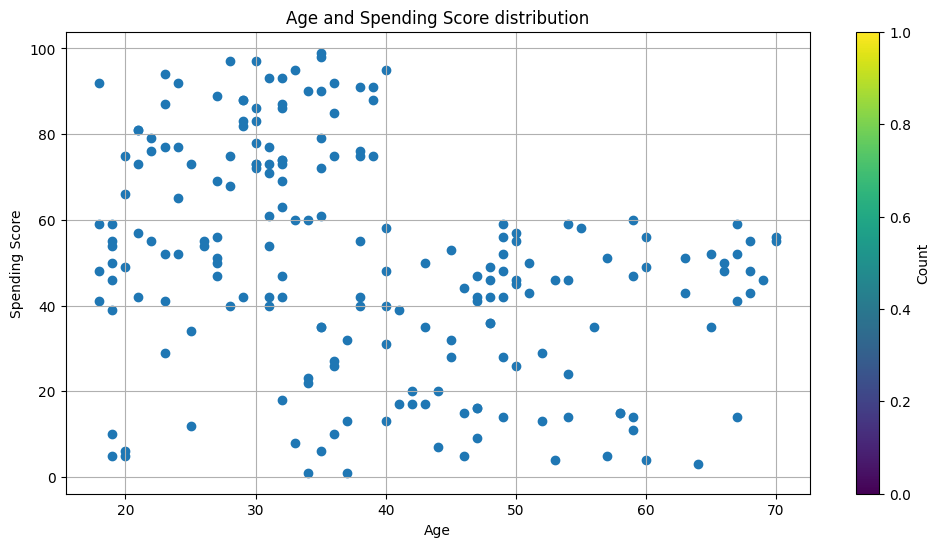

In [214]:
# Age and Spending Score distribution
plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.colorbar(label='Count')
plt.title('Age and Spending Score distribution')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

**we see that the <40 have more spending score than >40 but the >40 are more stabel then <40**

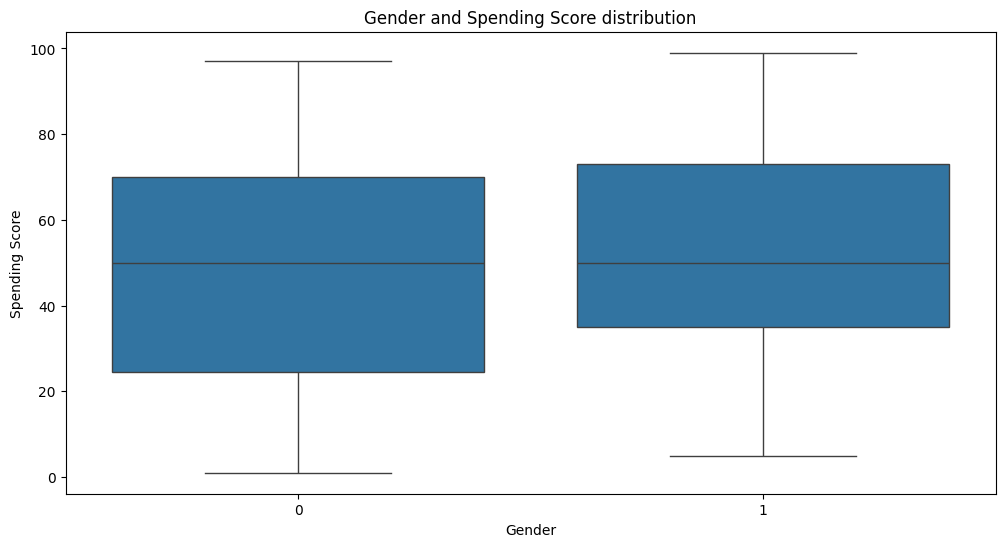

In [215]:
# Gender and Spending Score distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x= df['Gender'] , y= df['Spending Score (1-100)'])
plt.title('Gender and Spending Score distribution')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.show()

**we see that female has a sligthly more spending score than male**

# preprocissing the data :-

In [216]:

from sklearn.preprocessing import StandardScaler

# Selcting features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)





# loading the model :-

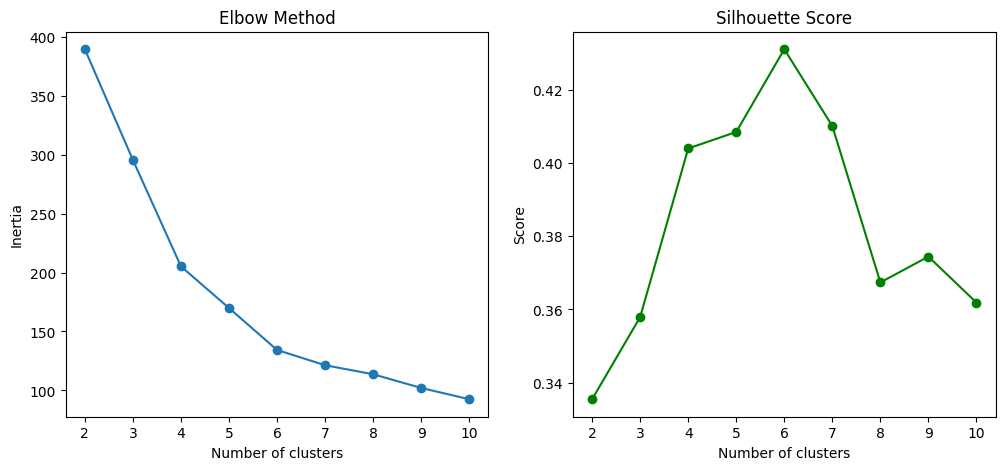

In [217]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


#  Determine optimal k using Elbow Method and Silhouette Score
inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    sil_scores.append(silhouette_score(X_scaled, model.labels_))

#  Plot Elbow and Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.show()

**we see that the best k is 6**

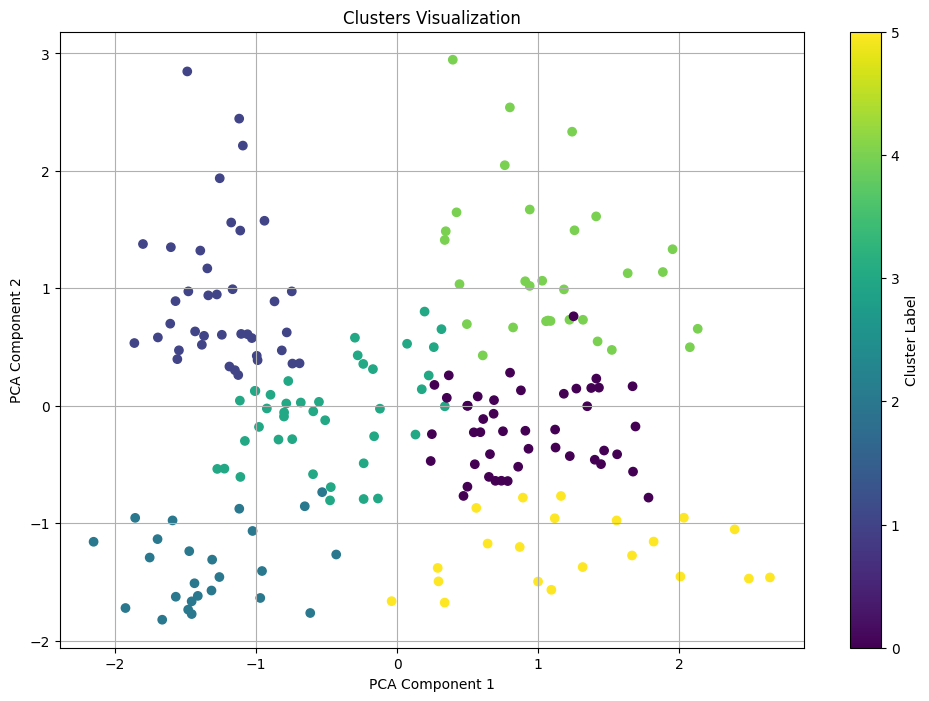

In [218]:
# fitting the KMeans model with the optimal number of clusters
k= 6
model = KMeans(n_clusters=k, random_state=42)
model.fit_predict(X_scaled)

# demensionality reduction for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# visualizing the clusters
plt.figure(figsize=(12, 8))
plt.scatter(df['PCA1'], df['PCA2'], c=model.labels_, cmap='viridis', alpha=1)
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# showing the results :-

In [219]:

# analyzing the clusters
cluster_analysis = df.groupby(model.labels_)[features].mean().round(2)
print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
     Age  Annual Income (k$)  Spending Score (1-100)
0  56.33               54.27                   49.07
1  32.69               86.54                   82.13
2  25.56               26.48                   76.24
3  26.12               59.42                   44.45
4  44.00               90.13                   17.93
5  45.52               26.29                   19.38


**from that we can label the data**

In [220]:
# adding cluster labels to the original dataframe
cluster_labels = {
    0: "Mature Moderate Spenders",
    1: "Wealthy Big Spenders",
    2: "Young Impulsive Shoppers",
    3: "Young Average Spenders",
    4: "Frugal High Earners",
    5: "Low-Income Low Spenders"
}

df['Cluster'] = model.labels_
df['Segment'] = df['Cluster'].map(cluster_labels)

# printing the segments
print("Customer Segments:")
print(df.head())


Customer Segments:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)      PCA1  \
0       0   19                  15                      39 -0.615720   
1       0   21                  15                      81 -1.665793   
2       1   20                  16                       6  0.337862   
3       1   23                  16                      77 -1.456573   
4       1   31                  17                      40 -0.038465   

       PCA2  Cluster                   Segment  
0 -1.763481        2  Young Impulsive Shoppers  
1 -1.820747        2  Young Impulsive Shoppers  
2 -1.674799        5   Low-Income Low Spenders  
3 -1.772430        2  Young Impulsive Shoppers  
4 -1.662740        5   Low-Income Low Spenders  


**now we can see all the data labeled for the Mall**

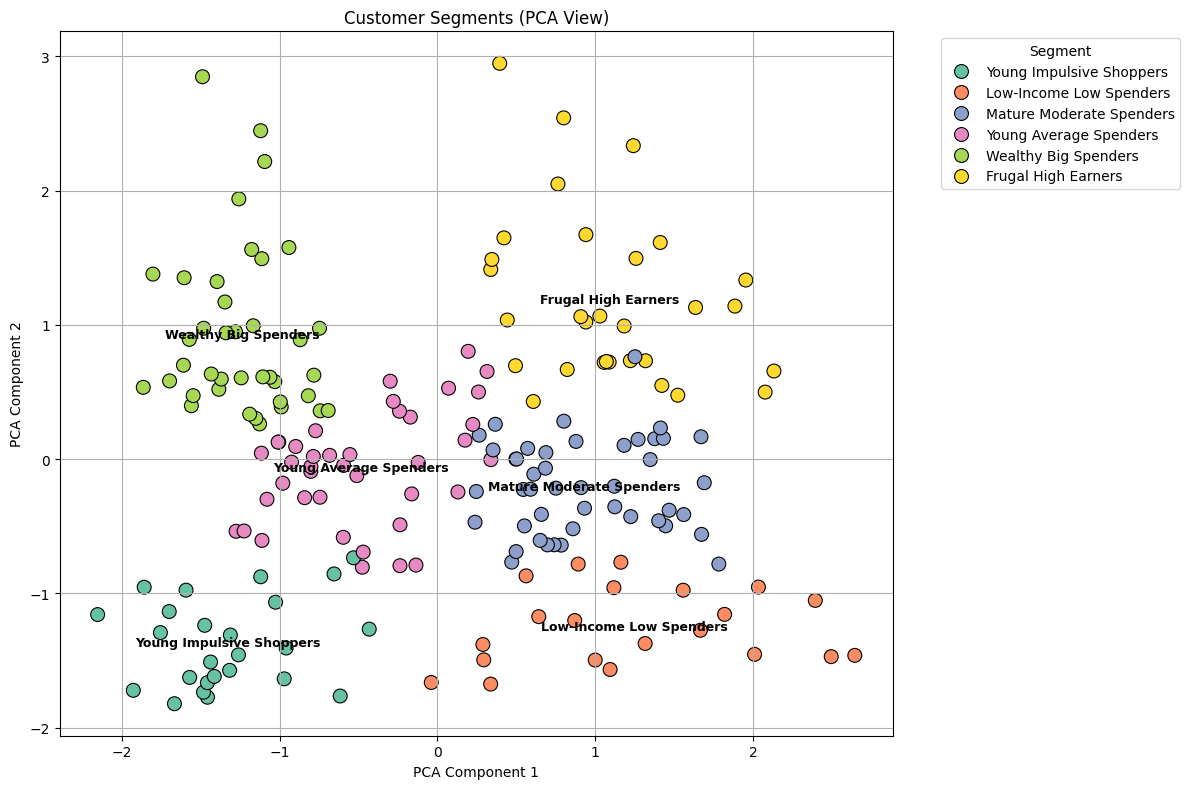

In [221]:
# visualizing the clusters with segments
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Segment', palette='Set2', s=100, edgecolor='black')
plt.title('Customer Segments (PCA View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

#Add cluster centers' text labels
centers = df.groupby('Cluster')[['PCA1', 'PCA2']].mean()

for i, row in centers.iterrows():
    plt.text(row['PCA1'], row['PCA2'], cluster_labels[i],
             
             fontsize=9, fontweight='bold', ha='center', va='center', color='black')
    
plt.tight_layout()
plt.show()


# future improvements :-

**we can load this data to an classification model to classify our new customer inputs**


# Cleaning the dataframe for saving in new csv file

In [222]:
# deencode the gender column back to original values
df['Gender'] = df['Gender'].map({0 : 'Male' , 1 : 'Female' })

# dropping the pca columns as they are not needed anymore
df.drop(['PCA1', 'PCA2'], axis=1, inplace=True)

# dropping the Cluster column as it is not needed anymore
df.drop('Cluster', axis=1, inplace=True)

# saving the cleaned dataset with segments
df.to_csv('DATA/Mall_Customers_Segmented.csv', index=False)
